In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intl-cricketer-stats-odi-t20-tests/t20_batting.csv
/kaggle/input/intl-cricketer-stats-odi-t20-tests/TEST_all_round.csv
/kaggle/input/intl-cricketer-stats-odi-t20-tests/t20_all_round.csv
/kaggle/input/intl-cricketer-stats-odi-t20-tests/t20_bowling.csv
/kaggle/input/intl-cricketer-stats-odi-t20-tests/ODI_bowling.csv
/kaggle/input/intl-cricketer-stats-odi-t20-tests/TEST_batting.csv
/kaggle/input/intl-cricketer-stats-odi-t20-tests/all_players.csv
/kaggle/input/intl-cricketer-stats-odi-t20-tests/country.csv
/kaggle/input/intl-cricketer-stats-odi-t20-tests/TEST_bowling.csv
/kaggle/input/intl-cricketer-stats-odi-t20-tests/fielding.csv
/kaggle/input/intl-cricketer-stats-odi-t20-tests/ODI_batting.csv
/kaggle/input/intl-cricketer-stats-odi-t20-tests/ODI_all_round.csv


In [2]:
#reading the required files
path='/kaggle/input/intl-cricketer-stats-odi-t20-tests/'
df=pd.read_csv(path+'all_players.csv')
df1=pd.read_csv(path+'country.csv')
df2=df.merge(df1,left_on='country_id',right_on='id')
df2

,id_x,name,gender,bating_style,bowling_style,playing_role,country_id,id_y,country
0,935995,Afif Hossain,M,left-hand bat,right-arm offbreak,allrounder,25,25,Bangladesh
1,380354,Anamul Haque,M,right-hand bat,NaN,wicketkeeper batter,25,25,Bangladesh
2,1346729,Dilara Akter,F,right-hand bat,NaN,wicketkeeper batter,25,25,Bangladesh
3,932355,Ebadot Hossain,M,right-hand bat,right-arm fast-medium,bowler,25,25,Bangladesh
4,627048,Fahima Khatun,F,right-hand bat,legbreak,bowler,25,25,Bangladesh
...,...,...,...,...,...,...,...,...,...
661,595004,K Verreynne,M,right-hand bat,right-arm offbreak,wicketkeeper batter,3,3,South Africa
662,379887,LB Williams,M,left-hand bat,right-arm medium-fast,bowler,3,3,South Africa
663,922481,L Wolvaardt,F,right-hand bat,NaN,opening batter,3,3,South Africa
664,318842,K Zondo,M,right-hand bat,right-arm offbreak,batter,3,3,South Africa


In [3]:
#merging the fielding dataframe with the above dataframe
path='/kaggle/input/intl-cricketer-stats-odi-t20-tests/'
df3=pd.read_csv(path+'fielding.csv')
df4=df3.merge(df2,left_on='id',right_on='id_x')
#dropping the players with span of play=NaN
df4=df4.dropna(subset=['sp'])
df4.set_index('id', inplace=True)
df4[['start_year','end_year']] = df4.sp.str.split('-',expand=True)
df4['innings']=round(df4['ds']/df4['dspi'],0)
df4['innings']=pd.to_numeric(df4['innings'], errors='coerce').convert_dtypes()
df4['start_year']=df4['start_year'].astype(str).astype(int)
df4['end_year']=df4['end_year'].astype(str).astype(int)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 935995 to 318842
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sp             424 non-null    object 
 1   cf             424 non-null    float64
 2   ck             424 non-null    float64
 3   ct             424 non-null    float64
 4   ds             424 non-null    float64
 5   dspi           424 non-null    float64
 6   mds            424 non-null    object 
 7   mt             424 non-null    int64  
 8   pr             0 non-null      float64
 9   st             424 non-null    float64
 10  id_x           424 non-null    int64  
 11  name           424 non-null    object 
 12  gender         424 non-null    object 
 13  bating_style   424 non-null    object 
 14  bowling_style  379 non-null    object 
 15  playing_role   421 non-null    object 
 16  country_id     424 non-null    int64  
 17  id_y           424 non-null    int64  
 18  co

In [4]:
#checking the top 10 players since 2012 who have highest number of catches and a minimum of 50 innings
df5=df4[(df4['start_year']>2012) & (df4['innings']>100)]
df5.sort_values(by=['cf'],ascending=False,inplace=True)
df5=df5.iloc[:10]
df5.sort_values(by=['cf'],inplace=True)
df5

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,sp,cf,ck,ct,ds,dspi,mds,mt,pr,st,...,gender,bating_style,bowling_style,playing_role,country_id,id_y,country,start_year,end_year,innings
id,,,,,,,,,,,,,,,,,,,,,
625371,2016-2023,79.0,0.0,79.0,79.0,0.446,2 (2ct 0st),169,NaN,0.0,...,M,right-hand bat,right-arm medium-fast,allrounder,6,6,India,2016,2023,177
422108,2014-2023,81.0,23.0,104.0,107.0,0.507,4 (4ct 0st),169,NaN,3.0,...,M,right-hand bat,NaN,opening batter,6,6,India,2014,2023,211
502714,2015-2023,84.0,0.0,84.0,84.0,0.381,3 (3ct 0st),200,NaN,0.0,...,M,left-hand bat,slow left-arm orthodox,bowling allrounder,5,5,Newziland,2015,2023,220
299572,2013-2023,84.0,0.0,84.0,84.0,0.381,3 (3ct 0st),209,NaN,0.0,...,M,right-hand bat,right-arm offbreak,batting allrounder,9,9,Zimbabwe,2013,2023,220
436677,2014-2022,92.0,0.0,92.0,92.0,0.582,4 (4ct 0st),149,NaN,0.0,...,M,left-hand bat,right-arm medium-fast,middle-order batter,25,25,Bangladesh,2014,2022,158
8917,2014-2023,94.0,0.0,94.0,94.0,0.299,4 (4ct 0st),261,NaN,0.0,...,M,left-hand bat,right-arm offbreak,batting allrounder,1,1,England,2014,2023,314
465793,2015-2023,99.0,0.0,99.0,99.0,0.550,4 (4ct 0st),146,NaN,0.0,...,M,right-hand bat,right-arm offbreak,allrounder,8,8,Sri Lanka,2015,2023,180
348144,2015-2023,118.0,0.0,118.0,118.0,0.421,2 (2ct 0st),241,NaN,0.0,...,M,right-hand bat,right-arm offbreak,batter,7,7,Pakistan,2015,2023,280
629074,2015-2023,121.0,27.0,148.0,154.0,0.636,4 (4ct 0st),199,NaN,6.0,...,M,right-hand bat,legbreak,wicketkeeper batter,8,8,Sri Lanka,2015,2023,242


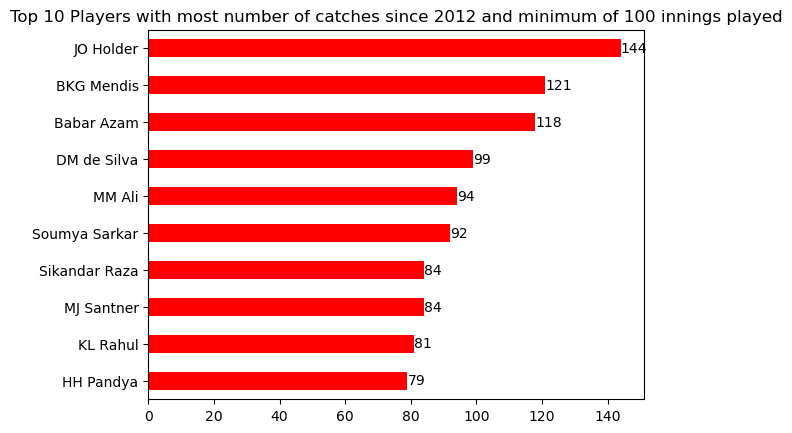

In [5]:
ax=df5.plot.barh(x='name',y='cf',color='red',legend=False,xlabel="",ylabel="", title='Top 10 Players with most number of catches since 2012 and minimum of 100 innings played')
for container in ax.containers:
    ax.bar_label(container)

In [6]:
#Top 10 players since 2016 who have most number of run outs

df6=df4[df4['start_year']>2016].sort_values(by=['ct'],ascending=False)
df6=df6.iloc[:10]
df6.sort_values(by=['ct'],inplace=True)
df6

,sp,cf,ck,ct,ds,dspi,mds,mt,pr,st,...,gender,bating_style,bowling_style,playing_role,country_id,id_y,country,start_year,end_year,innings
id,,,,,,,,,,,,,,,,,,,,,
595004,2020-2023,10.0,38.0,48.0,51.0,1.416,5 (5ct 0st),26,NaN,3.0,...,M,right-hand bat,right-arm offbreak,wicketkeeper batter,3,3,South Africa,2020,2023,36
337790,2018-2023,54.0,0.0,54.0,54.0,0.482,3 (3ct 0st),100,NaN,0.0,...,M,right-hand bat,legbreak,top-order batter,3,3,South Africa,2018,2023,112
364788,2018-2022,0.0,54.0,54.0,61.0,1.694,4 (4ct 0st),20,NaN,7.0,...,M,right-hand bat,NaN,wicketkeeper batter,1,1,England,2018,2022,36
440516,2017-2023,6.0,51.0,57.0,63.0,1.188,4 (4ct 0st),31,NaN,6.0,...,M,right-hand bat,right-arm offbreak,wicketkeeper batter,5,5,Newziland,2017,2023,53
436757,2018-2023,20.0,40.0,60.0,69.0,0.958,4 (3ct 1st),73,NaN,9.0,...,M,right-hand bat,right-arm offbreak,wicketkeeper batter,3,3,South Africa,2018,2023,72
512191,2017-2023,70.0,0.0,70.0,70.0,0.492,2 (2ct 0st),140,NaN,0.0,...,M,left-hand bat,slow left-arm orthodox,opening batter,7,7,Pakistan,2017,2023,142
1168667,2020-2023,0.0,71.0,71.0,76.0,1.948,4 (4ct 0st),22,NaN,5.0,...,M,right-hand bat,NaN,wicketkeeper batter,4,4,West Indies,2020,2023,39
600498,2017-2023,75.0,0.0,75.0,75.0,0.539,3 (3ct 0st),111,NaN,0.0,...,M,right-hand bat,right-arm offbreak,opening batter,3,3,South Africa,2017,2023,139
326434,2018-2023,5.0,143.0,148.0,165.0,1.279,6 (6ct 0st),116,NaN,17.0,...,M,left-hand bat,NaN,wicketkeeper batter,2,2,Australia,2018,2023,129


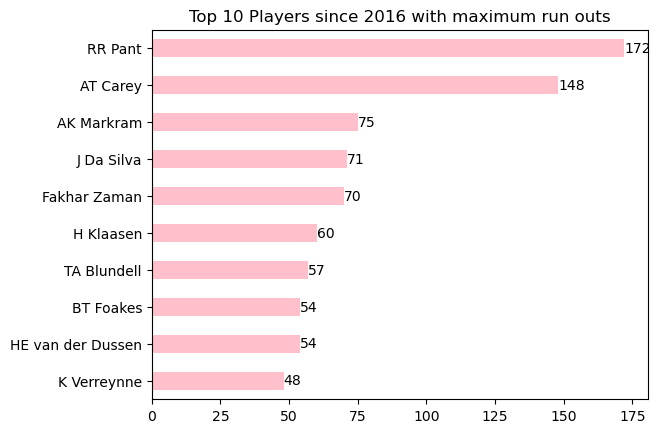

In [7]:
ax=df6.plot.barh(x='name',y='ct',color='pink',legend=False,xlabel="",ylabel="", title='Top 10 Players since 2016 with maximum run outs')
for container in ax.containers:
    ax.bar_label(container)